<a href="https://colab.research.google.com/github/khoadangtruong/Heart-Attack/blob/master/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = '/content/drive/MyDrive/data/heart.csv'

df = pd.read_csv(data_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
sns.set_theme()

In [ ]:
target_df = pd.DataFrame(pd.value_counts(df['target']))
target_df.rename(columns = {'target': 'Total'}, inplace = True)
target_df

,Total
1,165
0,138


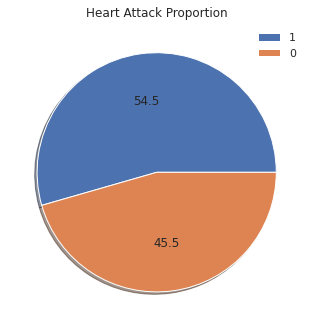

In [ ]:
plt.pie(
    x = target_df['Total'],
    labels = None,
    shadow = True,
    autopct = '%.1f'
)
plt.title('Heart Attack Proportion')
plt.legend(labels = target_df.index, loc = 'best')
plt.show()

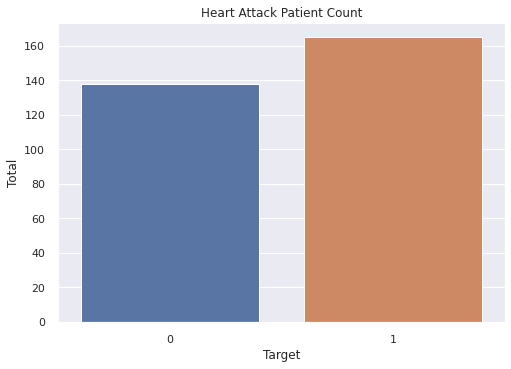

In [ ]:
sns.barplot(
    x = target_df.index,
    y = target_df['Total']
)
plt.title('Heart Attack Patient Count')
plt.xlabel('Target')
plt.ylabel('Total')
plt.show()

In [ ]:
sex_df = pd.DataFrame(df.groupby('sex')['sex'].count())
sex_df.rename(columns = {'sex': 'Total'}, inplace = True)
sex_df

,Total
sex,
0,96
1,207


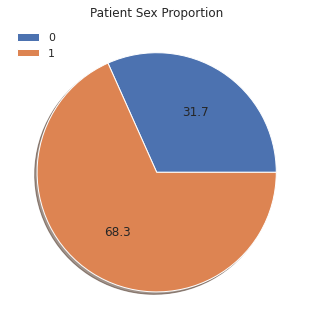

In [ ]:
plt.pie(
    x = sex_df['Total'],
    labels = None,
    shadow = True,
    autopct = '%.1f'
)
plt.title('Patient Sex Proportion')
plt.legend(labels = sex_df.index, loc = 'best')
plt.show()

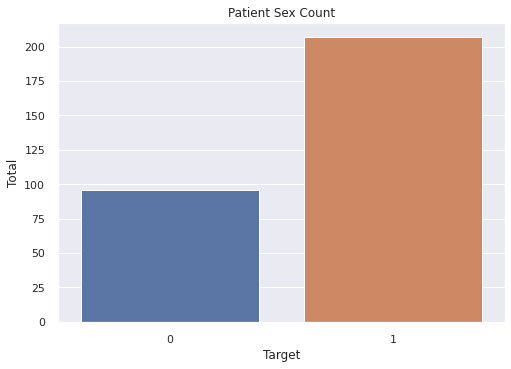

In [ ]:
sns.barplot(
    x = sex_df.index,
    y = sex_df['Total']
)
plt.title('Patient Sex Count')
plt.xlabel('Target')
plt.ylabel('Total')
plt.show()

In [ ]:
df[df['age'] <= 40]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


In [ ]:
X = np.asanyarray(df.iloc[:, 0:-1])
y = np.asanyarray(df[['target']])

In [ ]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8, random_state = 0)

In [ ]:
logistic_model = LogisticRegression(C = 0.01, solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
y_pred = logistic_model.predict(X_test)

print(y_test[0:5])
print(y_pred[0:5])

[[0]
 [1]
 [0]
 [0]
 [1]]
[0 1 1 0 0]


In [ ]:
y_pred_prob = logistic_model.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.81020386, 0.18979614],
       [0.41446441, 0.58553559],
       [0.38878391, 0.61121609],
       [0.79784763, 0.20215237],
       [0.66421201, 0.33578799]])

In [ ]:
jaccard = metrics.jaccard_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)

Jaccard score: 0.75

Report: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Confusion matrix: 


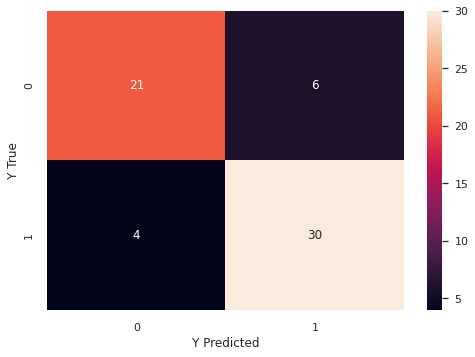

In [ ]:
print(f'Jaccard score: {round(jaccard, 2)}')
print(f'\nReport: ')
print(report)
print('\nConfusion matrix: ')

sns.heatmap(cm, annot = True, fmt = 'd')
plt.ylabel('Y True')
plt.xlabel('Y Predicted')
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
patient = logistic_model.predict_proba([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
patient

array([[0.00140662, 0.99859338]])

In [ ]:
def heart_attack_predict(arr):
    pred = logistic_model.predict_proba(arr)

    if pred[0][0] > pred[0][1]:
        return f'Patient may not have a heart attack with {round(pred[0][0], 3)}%'
    else:
        return f'Patient may have a heart attack with {round(pred[0][1], 3)}%'

In [ ]:
arr = [[57,0,0,120,354,0,1,163,1,0.6,2,0,2]]
result = heart_attack_predict(arr)
print(f'{result}')

Patient may have a heart attack with 0.999%
